# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Import semua library yang dibutuhkan untuk EDA, preprocessing, clustering, dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from yellowbrick.cluster import KElbowVisualizer

import joblib
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

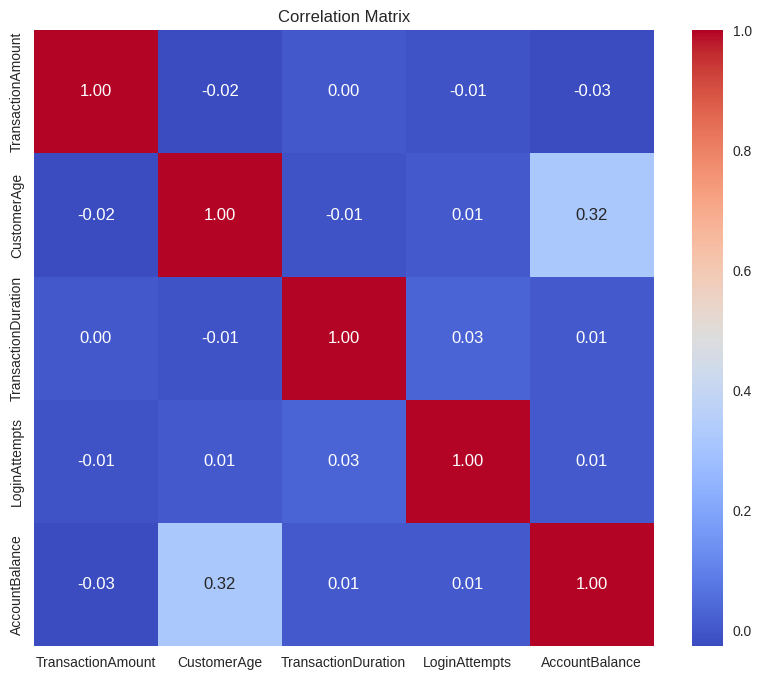

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

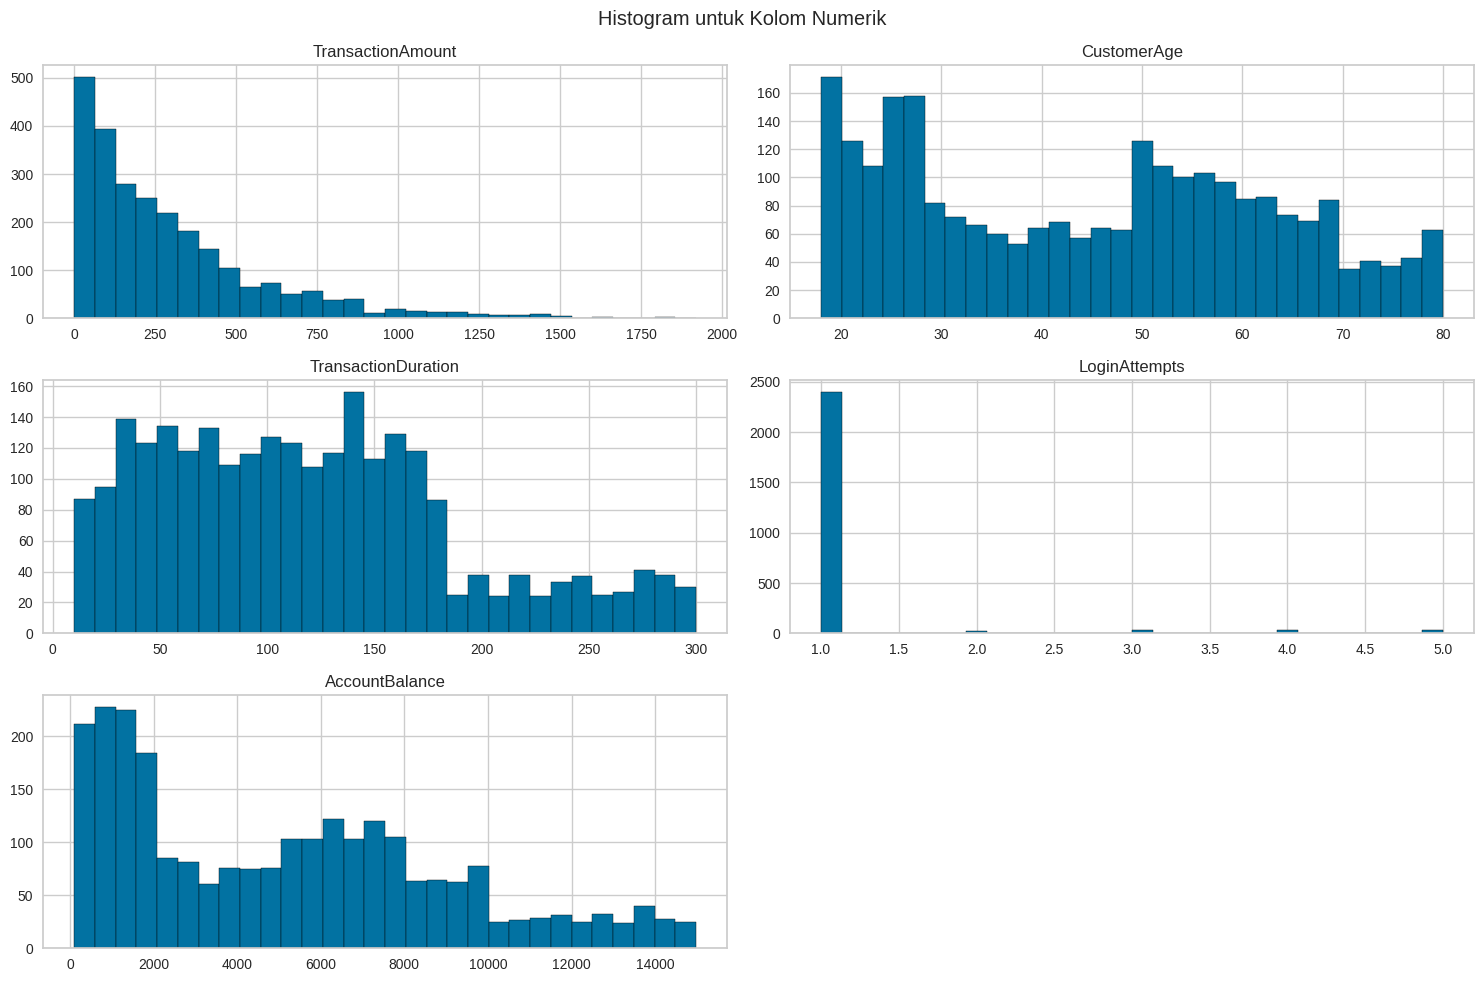

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histogram untuk Kolom Numerik')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

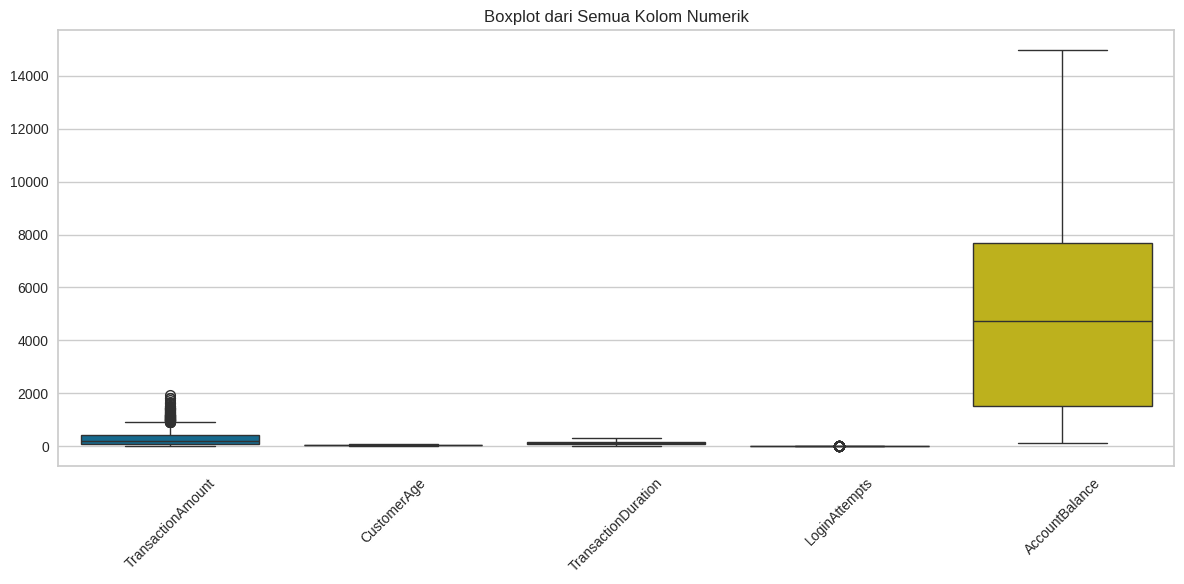

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Boxplot untuk melihat outlier pada fitur numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot dari Semua Kolom Numerik")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum() (Kriteria Basic)
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum() (Kriteria Basic)
df.duplicated().sum()

np.int64(21)

In [11]:
# Menangani Duplikat dan Missing Values (Kriteria Skilled)

# Menghapus data duplikat menggunakan drop_duplicates()
initial_rows = df.shape[0]
duplicates_count = df.duplicated().sum()
df = df.drop_duplicates()
rows_after_duplicates = df.shape[0]

# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna())
missing_values_before = df.isnull().sum()

# Pisahkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=['float64', 'int']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Isi missing values:
# Numerik dengan mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Kategorikal dengan modus
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Cek total missing values setelah penanganan
missing_after_fillna = df.isnull().sum().sum()

# Output
{
    "Jumlah baris sebelum duplikat dihapus": initial_rows,
    "Jumlah baris setelah duplikat dihapus": rows_after_duplicates,
    "Jumlah baris duplikat yang dihapus": int(duplicates_count),
    "Missing values sebelum ditangani (per kolom)": missing_values_before,
    "Total missing values setelah penanganan": missing_after_fillna
}

{'Jumlah baris sebelum duplikat dihapus': 2537,
 'Jumlah baris setelah duplikat dihapus': 2516,
 'Jumlah baris duplikat yang dihapus': 21,
 'Missing values sebelum ditangani (per kolom)': TransactionID              29
 AccountID                  21
 TransactionAmount          26
 TransactionDate            28
 TransactionType            30
 Location                   30
 DeviceID                   30
 IP Address                 20
 MerchantID                 23
 Channel                    27
 CustomerAge                18
 CustomerOccupation         23
 TransactionDuration        26
 LoginAttempts              21
 AccountBalance             27
 PreviousTransactionDate    24
 dtype: int64,
 'Total missing values setelah penanganan': np.int64(0)}

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address (Kriteria Basic)
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2535
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2516 non-null   float64
 1   TransactionDate          2516 non-null   object 
 2   TransactionType          2516 non-null   object 
 3   Location                 2516 non-null   object 
 4   Channel                  2516 non-null   object 
 5   CustomerAge              2516 non-null   float64
 6   CustomerOccupation       2516 non-null   object 
 7   TransactionDuration      2516 non-null   float64
 8   LoginAttempts            2516 non-null   float64
 9   AccountBalance           2516 non-null   float64
 10  PreviousTransactionDate  2516 non-null   object 
dtypes: float64(5), object(6)
memory usage: 235.9+ KB


In [13]:
# Melakukan feature encoding menggunakan pd.get_dummies() untuk fitur kategorikal (Kriteria Basic)

# Kolom waktu diubah ke datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Ekstrak fitur dari kolom waktu
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600

# Drop kolom waktu asli (karena sudah digantikan fitur turunan)
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)

# Drop kolom 'Location' karena terlalu banyak kategori
df.drop(columns=['Location'], inplace=True)

# Pilih kolom kategorikal yang akan di-encode
kolom_kategorikal_penting = ['TransactionType', 'Channel', 'CustomerOccupation']

# One-hot encoding → hasil defaultnya tipe bool (True/False)
df_encoded = pd.get_dummies(df, columns=kolom_kategorikal_penting)

# Konversi hanya kolom hasil encoding dari bool ke int (0/1)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Tampilkan hasil encoding
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TimeSinceLastTransaction,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,70.000000,81.0,1.0,5112.21,16,11,-13743.648333,0,1,1,0,0,1,0,0,0
1,376.24,68.000000,141.0,1.0,13758.91,16,27,-11895.421111,0,1,1,0,0,1,0,0,0
2,126.29,19.000000,56.0,1.0,1122.35,18,10,-11581.848889,0,1,0,0,1,0,0,0,1
3,184.50,26.000000,25.0,1.0,8569.06,16,5,-13167.615278,0,1,0,0,1,0,0,0,1
4,13.45,44.644916,198.0,1.0,7429.40,17,16,-9230.254167,1,0,0,0,1,0,0,0,1


In [14]:
# Mengecek jumlah baris kolom dan jenis data dalam dataset yang sudah di encoding dengan info.
df_encoded.info()

# Backup data sebelum scaling untuk keperluan interpretasi hasil clustering nanti
df_pre_scaling = df_encoded.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2535
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2516 non-null   float64
 1   CustomerAge                  2516 non-null   float64
 2   TransactionDuration          2516 non-null   float64
 3   LoginAttempts                2516 non-null   float64
 4   AccountBalance               2516 non-null   float64
 5   TransactionHour              2516 non-null   int32  
 6   TransactionDay               2516 non-null   int32  
 7   TimeSinceLastTransaction     2516 non-null   float64
 8   TransactionType_Credit       2516 non-null   int64  
 9   TransactionType_Debit        2516 non-null   int64  
 10  Channel_ATM                  2516 non-null   int64  
 11  Channel_Branch               2516 non-null   int64  
 12  Channel_Online               2516 non-null   int64  
 13  CustomerOccupation_Doct

### **Langkah-langkah yang dilakukan:**

1. **Mengubah kolom waktu ke format datetime:**
   * `TransactionDate` dan `PreviousTransactionDate` dikonversi ke tipe `datetime` agar bisa diolah lebih lanjut.
   * Ini penting agar kita bisa mengekstrak informasi waktu seperti jam dan hari transaksi.
2. **Ekstraksi fitur turunan dari kolom waktu:**
   * `TransactionHour`: jam saat transaksi terjadi (0–23)
   * `TransactionDay`: tanggal transaksi (1–31)
   * `TimeSinceLastTransaction`: selisih waktu antara dua transaksi terakhir dalam satuan jam
3. **Drop kolom waktu asli:**
   * Karena kita sudah mengambil informasi pentingnya, `TransactionDate` dan `PreviousTransactionDate` dihapus agar tidak membebani proses encoding dan modeling.
4. **Drop kolom 'Location':**
   * `Location` memiliki **43 kategori unik**, yang jika di-encode akan menghasilkan terlalu banyak kolom (sparse).
   * Untuk menyederhanakan model dan menghindari overfitting, kolom ini **dihapus**.
5. **One-hot encoding hanya dilakukan untuk kolom kategorikal yang penting dan manageable:**
   * `TransactionType`: menghasilkan 2 kolom → `TransactionType_Credit`, `TransactionType_Debit`
   * `Channel`: menghasilkan 3 kolom → `Channel_ATM`, `Channel_Branch`, `Channel_Online`
   * `CustomerOccupation`: menghasilkan 4 kolom → `CustomerOccupation_Doctor`, `CustomerOccupation_Engineer`, dll.
6. **Hasil encoding dikonversi dari boolean (True/False) ke numerik (0/1)** menggunakan `.astype(int)`:
   * Agar konsisten dengan kolom numerik lainnya.
   * Memudahkan interpretasi saat scaling, outlier handling, hingga model clustering.

### **Hasil akhir:**

| Komponen                     | Jumlah                             |
| ---------------------------- | ---------------------------------- |
| Kolom tambahan dari encoding | 9 kolom                            |
| Total kolom setelah encoding | 22 kolom                           |
| Tipe data hasil encoding     | `int` (0 atau 1)                   |
| Kolom waktu baru             | 3 kolom (Jam, Hari, Selisih waktu) |


### **Kenapa fitur ini penting?**

| Fitur                  | Alasan                                                                    |
| ---------------------- | ------------------------------------------------------------------------- |
| `TransactionType_*`    | Tipe transaksi (Credit/Debit) → memengaruhi pola nasabah                  |
| `Channel_*`            | Preferensi channel → ATM, Online, Branch                                  |
| `CustomerOccupation_*` | Jenis pekerjaan → memengaruhi pengeluaran, saldo, dan frekuensi transaksi |

In [15]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScaler() untuk fitur numerik (Kriteria Basic)

# Pilih kolom numerikal
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts',
                  'AccountBalance', 'TransactionHour', 'TransactionDay', 'TimeSinceLastTransaction']

# Inisialisasi scaler
scaler = StandardScaler()

# Salin dataframe encoded terlebih dahulu
df_scaled = df_encoded.copy()

# Terapkan scaling hanya ke kolom numerik
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TimeSinceLastTransaction,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.975065,1.428363,-0.553764,-0.206388,-0.001367,-0.848722,-0.543298,-0.785572,0,1,1,0,0,1,0,0,0
1,0.269840,1.315694,0.308211,-0.206388,2.229579,-0.848722,1.291979,-0.063162,0,1,1,0,0,1,0,0,0
2,-0.589373,-1.444690,-0.912920,-0.206388,-1.030795,1.887197,-0.658002,0.059403,0,1,0,0,1,0,0,0,1
3,-0.389274,-1.050350,-1.358274,-0.206388,0.890539,-0.848722,-1.231526,-0.560420,0,1,0,0,1,0,0,0,1
4,-0.977265,0.000000,1.127087,-0.206388,0.596494,0.519237,0.030226,0.978563,1,0,0,0,1,0,0,0,1


In [16]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada (Kriteria Basic)
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_scaled.columns.tolist()

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionHour',
 'TransactionDay',
 'TimeSinceLastTransaction',
 'TransactionType_Credit',
 'TransactionType_Debit',
 'Channel_ATM',
 'Channel_Branch',
 'Channel_Online',
 'CustomerOccupation_Doctor',
 'CustomerOccupation_Engineer',
 'CustomerOccupation_Retired',
 'CustomerOccupation_Student']

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut (Kriteria Advanced)

# Salin dataset hasil scaling
df_outlier_handled = df_scaled.copy()

# Proses capping outlier dengan metode IQR
for col in numerical_cols:
    Q1 = df_outlier_handled[col].quantile(0.25)
    Q3 = df_outlier_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping nilai yang di luar batas
    df_outlier_handled[col] = np.where(
        df_outlier_handled[col] < lower_bound, lower_bound,
        np.where(df_outlier_handled[col] > upper_bound, upper_bound, df_outlier_handled[col])
    )

# Cek hasil deskriptif setelah handling outlier
df_outlier_handled.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TimeSinceLastTransaction,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
count,2516.000000,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,-0.045909,1.581494e-16,-1.157880e-16,-2.063881e-01,5.048073e-17,-1.214362e-15,5.948254e-17,-1.553253e-17,0.223768,0.776232,0.328696,0.353339,0.317965,0.250000,0.246820,0.234897,0.268283
std,0.857468,1.000199e+00,1.000199e+00,1.238145e-14,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,0.416851,0.416851,0.469833,0.478102,0.465778,0.433099,0.431247,0.424018,0.443154
min,-1.022606,-1.501025e+00,-1.573768e+00,-2.063881e-01,-1.294250e+00,-8.487222e-01,-1.690345e+00,-1.714481e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.737711,-9.940153e-01,-8.123567e-01,-2.063881e-01,-9.283588e-01,-8.487222e-01,-8.874120e-01,-9.076180e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.289636,2.000344e-02,-7.967788e-02,-2.063881e-01,-7.147337e-02,-8.487222e-01,3.022626e-02,1.222458e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.384499,8.086847e-01,5.955359e-01,-2.063881e-01,6.510870e-01,5.192375e-01,8.331597e-01,8.748474e-01,0.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.000000,0.000000,1.000000
max,2.067815,1.991707e+00,2.592445e+00,-2.063881e-01,2.544115e+00,1.887197e+00,1.750798e+00,1.701082e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik, (Kriteria Advanced)
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# Salin data hasil scaling & outlier handling
df_binning = df_outlier_handled.copy()

# Binning menggunakan nilai asli sebelum scaling (pakai df_pre_scaling yang sudah dibackup sebelumnya)
# Binning CustomerAge
bins_age = [0, 25, 45, 65, 100]
labels_age = ['Youth', 'Adult', 'Middle-aged', 'Senior']
df_binning['CustomerAgeGroup'] = pd.cut(df_pre_scaling['CustomerAge'], bins=bins_age, labels=labels_age)

# Binning TransactionAmount
bins_amount = [-np.inf, 100, 1000, 10000, np.inf]
labels_amount = ['Very Low', 'Low', 'Medium', 'High']
df_binning['TransactionAmountGroup'] = pd.cut(df_pre_scaling['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Encode hasil binning
le = LabelEncoder()
df_binning['CustomerAgeGroup_enc'] = le.fit_transform(df_binning['CustomerAgeGroup'])
df_binning['TransactionAmountGroup_enc'] = le.fit_transform(df_binning['TransactionAmountGroup'])

# Cek hasilnya
df_binning[['CustomerAge', 'CustomerAgeGroup', 'CustomerAgeGroup_enc',
            'TransactionAmount', 'TransactionAmountGroup', 'TransactionAmountGroup_enc']].head()

,CustomerAge,CustomerAgeGroup,CustomerAgeGroup_enc,TransactionAmount,TransactionAmountGroup,TransactionAmountGroup_enc
0,1.428363,Senior,2,-0.975065,Very Low,2
1,1.315694,Senior,2,0.269840,Low,0
2,-1.444690,Youth,3,-0.589373,Low,0
3,-1.050350,Adult,0,-0.389274,Low,0
4,0.000000,Adult,0,-0.977265,Very Low,2


### Binning Data

1. **Metode yang Digunakan:**
Pada tahap ini, saya menggunakan binning untuk mengelompokkan dua fitur numerik: CustomerAge dan TransactionAmount. Proses binning dilakukan menggunakan fungsi pd.cut() untuk mengubah nilai numerik kontinu menjadi kategori diskrit. Setelah itu, hasil binning dikonversi menjadi bentuk numerik menggunakan LabelEncoder agar dapat digunakan dalam proses clustering.
2. **Alasan Penggunaan:**
Binning diterapkan karena:
 - Membantu menyederhanakan data numerik menjadi kategori bermakna, seperti Youth, Adult, Senior untuk umur, atau Low, Medium, High untuk jumlah transaksi.
 - Binning dapat memperjelas interpretasi hasil clustering dan membuat pola perilaku nasabah lebih mudah dianalisis.
 - LabelEncoder digunakan karena model Machine Learning tidak dapat memproses data bertipe string atau kategori, sehingga perlu dikonversi ke angka.
>Note: Binning dilakukan terhadap data sebelum scaling (df_pre_scaling) agar rentang nilai tetap valid, kemudian disisipkan ke dataset final (df_binning) yang sudah melalui semua tahap preprocessing.
3. **Hasil yang Didapat:**
 - Fitur CustomerAge berhasil dikategorikan menjadi 4 kelompok usia: Youth, Adult, Middle-aged, dan Senior.
 - Fitur TransactionAmount dikategorikan menjadi: Very Low, Low, Medium, dan High.
 - Kategori tersebut kemudian diubah menjadi angka 0, 1, 2, 3 menggunakan LabelEncoder.
 - Kolom CustomerAgeGroup_enc dan TransactionAmountGroup_enc siap digunakan sebagai fitur tambahan dalam proses clustering.
>Contoh: CustomerAge ≈ 1.42 (scaled) → 'Senior' → encoded jadi 2  
TransactionAmount ≈ -0.97 (scaled) → 'Very Low' → encoded jadi 2

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [19]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [20]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [21]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [22]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

In [23]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [24]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_binning.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TimeSinceLastTransaction,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAgeGroup_enc,TransactionAmountGroup_enc
count,2516.000000,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,-0.045909,1.581494e-16,-1.157880e-16,-2.063881e-01,5.048073e-17,-1.214362e-15,5.948254e-17,-1.553253e-17,0.223768,0.776232,0.328696,0.353339,0.317965,0.250000,0.246820,0.234897,0.268283,1.203498,0.612878
std,0.857468,1.000199e+00,1.000199e+00,1.238145e-14,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,0.416851,0.416851,0.469833,0.478102,0.465778,0.433099,0.431247,0.424018,0.443154,1.085566,0.902601
min,-1.022606,-1.501025e+00,-1.573768e+00,-2.063881e-01,-1.294250e+00,-8.487222e-01,-1.690345e+00,-1.714481e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.737711,-9.940153e-01,-8.123567e-01,-2.063881e-01,-9.283588e-01,-8.487222e-01,-8.874120e-01,-9.076180e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.289636,2.000344e-02,-7.967788e-02,-2.063881e-01,-7.147337e-02,-8.487222e-01,3.022626e-02,1.222458e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.384499,8.086847e-01,5.955359e-01,-2.063881e-01,6.510870e-01,5.192375e-01,8.331597e-01,8.748474e-01,0.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.000000,0.000000,1.000000,2.000000,2.000000
max,2.067815,1.991707e+00,2.592445e+00,-2.063881e-01,2.544115e+00,1.887197e+00,1.750798e+00,1.701082e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


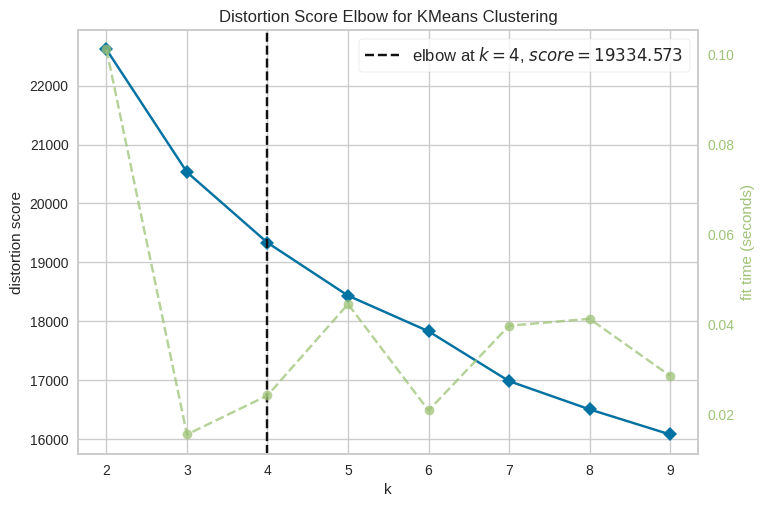

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Hanya ambil kolom numerik, termasuk hasil encoding
X = df_binning.drop(columns=['CustomerAgeGroup', 'TransactionAmountGroup'])

# Inisialisasi model
model = KMeans(random_state=42)

# Visualisasi Elbow
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X)
visualizer.show()

In [26]:
# Menggunakan algoritma K-Means Clustering

# Inisialisasi dan latih model dengan jumlah cluster optimal (k=4)
model_kmeans = KMeans(n_clusters=4, random_state=42)
model_kmeans.fit(X)

# Tambahkan hasil cluster ke dataframe
df_binning['Target'] = model_kmeans.labels_ + 1

Jalankan cell code ini untuk menyimpan model kamu.

In [27]:
# Menyimpan model menggunakan joblib
import joblib

# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [28]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(X, df_binning['Target'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1314


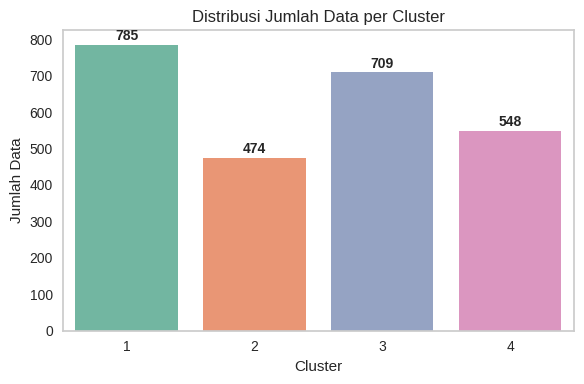

In [29]:
# Membuat visualisasi hasil clustering

# Hitung jumlah data per cluster
cluster_counts = df_binning['Target'].value_counts().sort_index()

# Visualisasi bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')

# Tambahkan label jumlah di atas setiap bar
for i, count in enumerate(cluster_counts.values):
    plt.text(x=i, y=count + 5, s=str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [30]:
# Membangun model menggunakan PCA.

# Inisialisasi dan fit PCA dengan 2 komponen utama
pca_model = PCA(n_components=2, random_state=42)
pca_model.fit(X)

PCA(n_components=2, random_state=42)

In [31]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [32]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
cluster_stats = df_binning.groupby('Target')[numerical_cols].agg(['min', 'mean', 'max']).round(2)
display(cluster_stats.T.style.set_table_attributes('style="display:inline"'))

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya

### **Cluster 1: Nasabah Senior dengan Saldo Sedang dan Aktivitas Stabil**

* **Umur** sangat tinggi *(mean = 1.08)* → kelompok pelanggan senior.
* **TransactionAmount** relatif rendah *(mean = -0.04)*.
* **AccountBalance** tergolong sedang *(mean = -0.19)*.
* **LoginAttempts** dan **TransactionDuration** normal.
* **Analisis**: Nasabah ini tergolong senior, punya saldo cukup, tapi tidak terlalu aktif bertransaksi. Mereka mungkin cocok ditawari produk tabungan pensiun atau proteksi finansial jangka panjang.

### **Cluster 2: Nasabah Muda dengan Aktivitas dan Saldo Rendah**

* **Umur** sangat rendah *(mean = -1.30)* → nasabah muda/pelajar.
* **AccountBalance** paling rendah *(mean = -0.91)*.
* **TransactionAmount** cukup tinggi *(mean = 0.01)*.
* **Analisis**: Kelompok ini masih aktif bertransaksi namun saldo kecil, cocok diberi program edukasi finansial, cash-back, atau reward loyalitas agar tetap engaged.

### **Cluster 3: Nasabah Dewasa Aktif dengan Saldo Rendah**

* **Umur** sedang *(mean = -0.55)* → usia produktif.
* **TransactionAmount** rendah *(mean = -0.04)*.
* **AccountBalance** masih rendah *(mean = -0.27)*.
* **TransactionDuration** lebih pendek *(mean = -0.05)*.
* **Analisis**: Kelompok ini rutin menggunakan layanan, namun tidak menyimpan banyak dana. Cocok diberikan promosi pembayaran digital atau paket transaksi murah.

### **Cluster 4: Nasabah Mapan dengan Saldo Tinggi**

* **Umur** cukup dewasa *(mean = 0.30)*.
* **AccountBalance** sangat tinggi *(mean = 1.41)*.
* **TransactionAmount** paling rendah *(mean = -0.12)*.
* **Analisis**: Mereka menyimpan dana dalam jumlah besar tapi jarang melakukan transaksi besar. Potensi untuk ditawari produk investasi, deposito, atau private banking.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [33]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_binning.to_csv('data_clustering.csv', index=False)

In [34]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_binning.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [35]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

# Salin ulang dataframe untuk inverse
df_inverse = df_binning.copy()

# Invers transform fitur numerik
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Mapping encoding ke label aslinya (hasil binning)
from sklearn.preprocessing import LabelEncoder

# LabelEncoder harus dilatih ulang pakai label aslinya
le_age = LabelEncoder()
le_age.fit(['Youth', 'Adult', 'Middle-aged', 'Senior'])

le_amt = LabelEncoder()
le_amt.fit(['Very Low', 'Low', 'Medium', 'High'])

df_inverse['CustomerAgeGroup'] = le_age.inverse_transform(df_inverse['CustomerAgeGroup_enc'])
df_inverse['TransactionAmountGroup'] = le_amt.inverse_transform(df_inverse['TransactionAmountGroup_enc'])

In [36]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# 4. Statistik fitur numerik
numerical_stats = df_inverse.groupby('Target')[numerical_cols].agg(['min', 'mean', 'max']).round(2)

# 5. Statistik fitur kategorikal hasil binning (pakai mode)
categorical_stats = df_inverse.groupby('Target')[['CustomerAgeGroup', 'TransactionAmountGroup']].agg(lambda x: x.mode()[0])

# 6. Tampilkan
print("Statistik Fitur Numerik:")
display(numerical_stats.T)

print("\nStatistik Fitur Kategorikal (Mode per Cluster):")
display(categorical_stats)

Statistik Fitur Numerik:


Target                                1         2         3         4
TransactionAmount        min       0.84      0.26      0.32      1.14
                         mean    286.37    300.04    287.32    264.22
                         max     899.28    899.28    899.28    899.28
CustomerAge              min      47.00     18.00     26.00     29.00
                         mean     63.73     21.58     34.80     49.99
                         max      80.00     25.00     54.00     70.00
TransactionDuration      min      10.00     11.00     10.00     10.00
                         mean    118.27    122.94    116.15    122.82
                         max     296.00    299.00    300.00    300.00
LoginAttempts            min       1.00      1.00      1.00      1.00
                         mean      1.00      1.00      1.00      1.00
                         max       1.00      1.00      1.00      1.00
AccountBalance           min     120.89    102.20    101.25   5117.03
                         mean   4378.61   1583.41   4088.24  10564.49
                         max    8384.85   9963.39   9977.49  14977.99
TransactionHour          min      16.00     16.00     16.00     16.00
                         mean     16.63     16.65     16.60     16.61
                         max      18.00     18.00     18.00     18.00
TransactionDay           min       1.00      1.00      1.00      1.00
                         mean     15.61     16.09     15.71     15.64
                         max      31.00     31.00     31.00     31.00
TimeSinceLastTransaction min  -16120.04 -16120.17 -16120.19 -16120.15
                         mean -11717.88 -11809.93 -11728.45 -11697.80
                         max   -7382.83  -7455.62  -7381.75  -7382.82


Statistik Fitur Kategorikal (Mode per Cluster):


,CustomerAgeGroup,TransactionAmountGroup
Target,,
1,Middle-aged,High
2,Youth,High
3,Adult,High
4,Middle-aged,High


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

### **Cluster 1: Nasabah Paruh Baya dengan Aktivitas Sedang**
* **Rata-rata TransactionAmount:** Sebelum inverse: `-0.04` → Setelah inverse: `Rp286.37`
* **Rata-rata CustomerAge:** Sebelum inverse: `1.08` → Setelah inverse: `63.73 tahun`
* **Rata-rata AccountBalance:** Sebelum inverse: `-0.19` → Setelah inverse: `Rp4.378`
* **Rata-rata TransactionDuration:** Sebelum inverse: `-0.02` → Setelah inverse: `118.27 detik`
* **Rata-rata LoginAttempts:** Sebelum inverse: `-0.21` → Setelah inverse: `1`
* **Rata-rata TimeSinceLastTransaction:** Sebelum inverse: `0.01` → Setelah inverse: `-11.717 jam`
* **CustomerAgeGroup:** Middle-aged
* **TransactionAmountGroup:** High
**Analisis:**
Nasabah paruh baya dengan transaksi nominal tinggi dan saldo sedang. Durasi transaksi cukup panjang, menandakan stabilitas dan kebiasaan transaksi rutin. Cocok ditawari program loyalitas atau produk keuangan jangka panjang.

### **Cluster 2: Nasabah Muda dengan Saldo Rendah**

* **Rata-rata TransactionAmount:** Sebelum inverse: `0.01` → Setelah inverse: `Rp300.04`
* **Rata-rata CustomerAge:** Sebelum inverse: `-1.30` → Setelah inverse: `21.58 tahun`
* **Rata-rata AccountBalance:** Sebelum inverse: `-0.91` → Setelah inverse: `Rp1.583`
* **Rata-rata TransactionDuration:** Sebelum inverse: `0.05` → Setelah inverse: `122.94 detik`
* **Rata-rata LoginAttempts:** Sebelum inverse: `-0.21` → Setelah inverse: `1`
* **Rata-rata TimeSinceLastTransaction:** Sebelum inverse: `-0.03` → Setelah inverse: `-11.810 jam`
* **CustomerAgeGroup:** Youth
* **TransactionAmountGroup:** High

**Analisis:**
Kelompok usia muda yang sangat aktif transaksi, namun saldo rendah. Mereka cocok menerima promosi reward, edukasi finansial, atau layanan keuangan mikro.

### **Cluster 3: Nasabah Dewasa Aktif dengan Saldo Menengah**

* **Rata-rata TransactionAmount:** Sebelum inverse: `-0.04` → Setelah inverse: `Rp287.32`
* **Rata-rata CustomerAge:** Sebelum inverse: `-0.55` → Setelah inverse: `34.80 tahun`
* **Rata-rata AccountBalance:** Sebelum inverse: `-0.27` → Setelah inverse: `Rp4.088`
* **Rata-rata TransactionDuration:** Sebelum inverse: `-0.05` → Setelah inverse: `116.15 detik`
* **Rata-rata LoginAttempts:** Sebelum inverse: `-0.21` → Setelah inverse: `1`
* **Rata-rata TimeSinceLastTransaction:** Sebelum inverse: `0.00` → Setelah inverse: `-11.728 jam`
* **CustomerAgeGroup:** Adult
* **TransactionAmountGroup:** High

**Analisis:**
Nasabah usia produktif yang aktif dan memiliki saldo sedang. Potensi ditawarkan produk digital banking, mobile wallet, atau kredit ringan.

### **Cluster 4: Nasabah Mapan dengan Saldo Tinggi**

* **Rata-rata TransactionAmount:** Sebelum inverse: `-0.12` → Setelah inverse: `Rp264.22`
* **Rata-rata CustomerAge:** Sebelum inverse: `0.30` → Setelah inverse: `49.99 tahun`
* **Rata-rata AccountBalance:** Sebelum inverse: `1.41` → Setelah inverse: `Rp10.564`
* **Rata-rata TransactionDuration:** Sebelum inverse: `0.05` → Setelah inverse: `122.82 detik`
* **Rata-rata LoginAttempts:** Sebelum inverse: `-0.21` → Setelah inverse: `1`
* **Rata-rata TimeSinceLastTransaction:** Sebelum inverse: `0.01` → Setelah inverse: `-11.698 jam`
* **CustomerAgeGroup:** Middle-aged
* **TransactionAmountGroup:** High

**Analisis:**
Nasabah mapan dengan saldo besar namun nominal transaksi kecil. Cocok diarahkan ke layanan eksklusif seperti private banking, deposito, atau produk investasi.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [37]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Target'] = df_binning['Target']

In [38]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)